## R-NSGA-II

The implementation details of this algorithm can be found in Reference Point Based Multi-Objective Optimization Using Evolutionary Algorithms <cite data-cite="rnsga2"></cite>. 
The algorithm follows the general outline of NSGA-II with modified survival selection. 

In R-NSGA-II individuals are first selected frontwise. By doing so, there will be the situation where a front needs to be split because not all individuals are allowed to survive. 
In this splitting front, solutions are selected based on rank.

The rank is calculated as the euclidean distance to each reference point, the solution closest to a reference point is thus assigned a rank of 1. The best rank for each solution is selected as the rank of that solution. 

<div style="display: block;margin-left: auto;margin-right: auto;width: 80%;">
![nsga2_survival](../resources/images/rnsga2.png)
</div>

Next solutions are selected for each reference point frontwise based on rank, after each reference point has selected a solution for survival all solutions within epsilon distance of surviving solutions are "cleared." This means that they can not be selected for survival until and unless every front has been processed and more solutions still need to be selected.

This means smaller epsilon values will result in a tighter set of solutions.

### Example

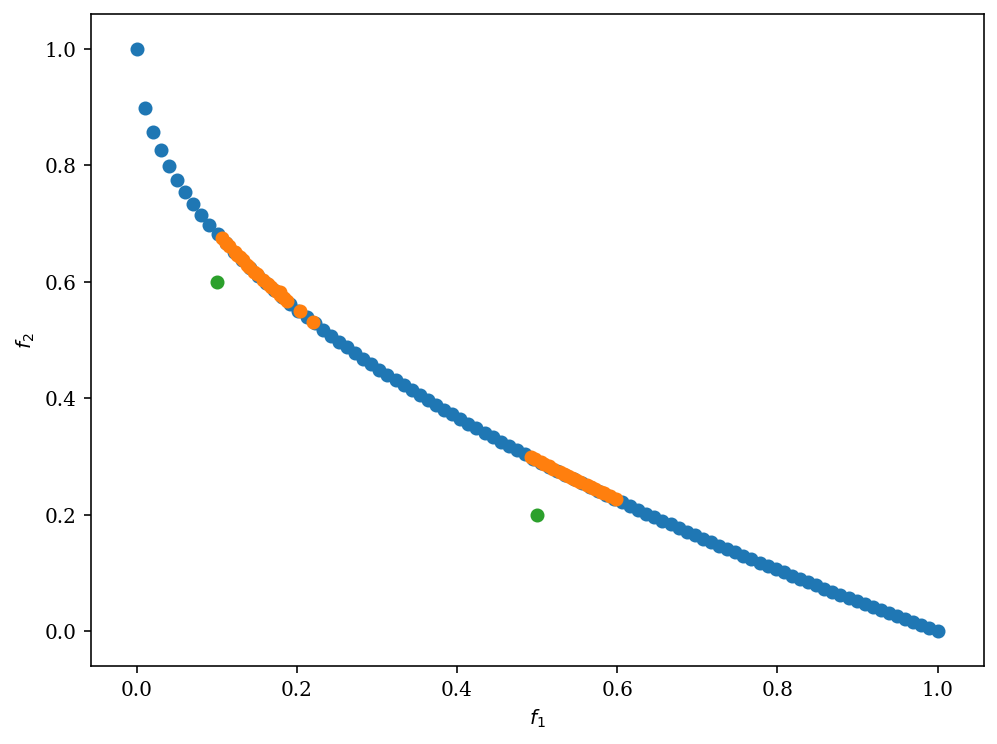

In [1]:
import numpy as np

from pymoo.algorithms.rnsga2 import RNSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1", n_var=30)
pf = problem.pareto_front()

# Define reference points
ref_points = np.array([[0.5, 0.2], [0.1, 0.6]])

# Get Algorithm
algorithm = RNSGA2(
    ref_points=ref_points,
    pop_size=40,
    epsilon=0.01,
    normalization='front',
    extreme_points_as_reference_points=False,
    weights=np.array([0.5, 0.5]))

res = minimize(problem,
               algorithm,
               save_history=True,
               termination=('n_gen', 250),
               seed=1,
               pf=pf,
               disp=False)


Scatter().add(pf, label="pf").add(res.F, label="F").add(ref_points, label="ref_points").show()


### API